In [20]:
import matplotlib.pyplot as plt
import random

In [21]:
class UndirectedGraph:
    def __init__(self, num_vertices = None):
        self.graph = {}
        self.num_vertices = num_vertices
        self.edgeCount = 0
        self.nodeCount = 0

        if num_vertices:
            for i in range(1,self.num_vertices+1):
                self.graph[i] = list()
        
    def addNode(self, node):
        if self.num_vertices is not None and (node < 1 or node > self.num_vertices):
            raise Exception("Node index cannot exceed the number of nodes")
        self.graph[node] = list()
        self.nodeCount += 1
    
    def addEdge(self, node1, node2):
        if node1 not in self.graph:
            self.addNode(node1)
        if node2 not in self.graph:
            self.addNode(node2)
        
        self.graph[node1].append(node2)
        self.graph[node2].append(node1)
        self.edgeCount += 1

    def __add__(self, other):
        new_graph = UndirectedGraph(self.num_vertices)
        new_graph.graph = {node: neighbours.copy() for node,neighbours in self.graph.items()}
        new_graph.edgeCount = self.edgeCount
        new_graph.nodeCount = self.nodeCount

        if type(other) == int:
            new_graph.addNode(other)
        elif type(other) == tuple:
            new_graph.addEdge(other[0], other[1])

        return new_graph
    
    def __str__(self):
        s = f"Graph with {self.nodeCount if not self.num_vertices else self.num_vertices} nodes and {self.edgeCount} edges. Neighbours of the nodes are below:\n"
        for node in self.graph:
            s += f"Node {node}: {{{','.join(map(str, self.graph[node]))}}}\n"
        return s
    
    def isConnected(self):
        if not self.graph:
            return False
        
        start_node = next(iter(self.graph))
        queue = [start_node]
        visited = set()
        visited.add(start_node)

        while queue:
            curr_node = queue.pop(0)
            for neighbour in self.graph[curr_node]:
                if neighbour not in visited:
                    queue.append(neighbour)
                    visited.add(neighbour)
        
        return len(visited) == len(self.graph)

    def oneTwoComponentSizes(self):
        if not self.graph:
            return 0,0
        
        visited = set()
        largest_component_size = 0
        second_largest_component_size = 0

        for node in self.graph:
            if node not in visited:
                queue = [node]
                visited.add(node)
                component_size = 1

                while queue:
                    curr_node = queue.pop(0)
                    for neighbour in self.graph[curr_node]:
                        if neighbour not in visited:
                            queue.append(neighbour)
                            visited.add(neighbour)
                            component_size += 1    
                
                if component_size > largest_component_size:
                    second_largest_component_size = largest_component_size
                    largest_component_size = component_size
                elif component_size > second_largest_component_size:
                    second_largest_component_size = component_size
        
        return largest_component_size, second_largest_component_size
            
    def plotDegDist(self):
        degrees = [len(neighbours) for neighbours in self.graph.values()]
        total_nodes = len(degrees)

        degree_count = {degree: degrees.count(degree) for degree in set(degrees)}

        for i in range(max(degrees) + 1):
            if i not in degree_count:
                degree_count[i] = 0
        
        x_values = list(degree_count.keys())
        y_values = [count/total_nodes for count in degree_count.values()]

        average_degree = sum(degrees)/total_nodes

        # Plot degree distribution with points
        plt.scatter(x_values, y_values, color='blue', label='Actual degree distribution')
        plt.axvline(x=average_degree, color='red', linewidth=2, label='Avg. node degree')

        plt.title("Node Degree Distribution")
        plt.xlabel("Node Degree")
        plt.ylabel("Fraction of Nodes")
        plt.legend()
        plt.grid()
        plt.show()

class ERRandomGraph(UndirectedGraph):
    def __init__(self, num_vertices):
        super().__init__(num_vertices)
        
    def sample(self, p):
        for i in range(1, self.num_vertices+1):
            for j in range(i+1, self.num_vertices+1):
                if random.random() < p:
                    self.addEdge(i,j)
    





In [22]:
g = ERRandomGraph(100)
g.sample(0.01)
print(g.oneTwoComponentSizes())

(19, 11)


In [25]:
import math as mt
from IPython.display import clear_output

def verify():
    CC_threshold = 0.001
    Co_threshold = mt.log(1000)/1000
    y1 = []
    y2 = []
    p = []
    i = 0
    while i <= 0.008:
        avg1 = []
        avg2 = []
        p.append(i)
        for _ in range(50):
            g = ERRandomGraph(1000)
            g.sample(i)
            t = g.oneTwoComponentSizes()
            avg1.append(t[0])
            avg2.append(t[1])

        # print(i)
        i += 0.00008

        y1.append((sum(avg1)/len(avg1))/1000)
        y2.append((sum(avg2)/len(avg2))/1000)

        plt.plot(p,y1,color='g',label='Largest connected component')
        plt.plot(p,y2,color='b',label='2nd largest connected component')
        plt.axvline(x = Co_threshold,color = 'orange',label = 'Connectedness threshold')
        plt.axvline(x = CC_threshold,color = 'r',label = 'Largest CC size threshold')
        plt.title('Fraction of nodes in the largest and second-largest connected components (CC) of G(1000, p) as function of p')
        plt.xlabel('p')
        plt.ylabel('fraction of nodes')
        plt.grid()
        plt.legend()
        plt.show()
        clear_output(wait=True)

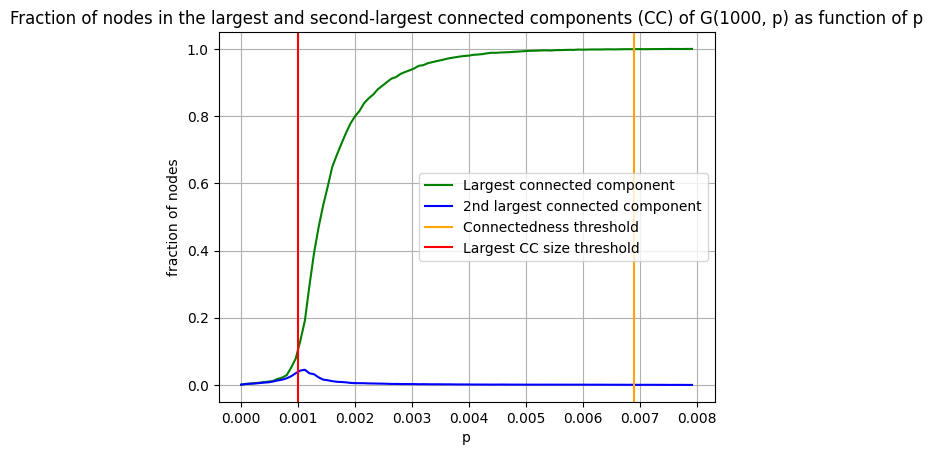

In [26]:
verify()